# Timeonaxis 3
This example compares what the system time function gmtime and localtime give
with what gives TGaxis. It can be used as referenced test to check if TGaxis
is working properly.
The original code was developed by Philippe Gras (CEA Saclay. IRFU/SEDI)




**Author:**  Philippe Gras, Bertrand Bellenot, Olivier Couet  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:50 AM.</small></i>

In [1]:
#if defined(G__WIN32) && defined(__CINT__) && !defined(__MAKECINT__)
{
   // timeonaxis3.C has to be run in compiled mode on Windows.
   // the following code does it.

   gSystem->CompileMacro("timeonaxis3.C");
   timeonaxis3();
}
#else

#include "TAxis.h"
#include "TGaxis.h"
#include "TCanvas.h"
#include "TString.h"
#include "TLine.h"
#include "TLatex.h"
#include <time.h>
#include <stdio.h>





#endif

 A helper function is created: 

In [2]:
%%cpp -d
TString stime(time_t* t, bool utc = false, bool display_time_zone = true) {
   struct tm* tt;
   if (utc) tt = gmtime(t);
   else     tt = localtime(t);
   char buf[256];
   if (display_time_zone) strftime(buf, sizeof(buf), "%Y-%m-%d  %H:%M:%S %Z", tt);
   else                   strftime(buf, sizeof(buf), "%Y-%m-%d %H:%M:%S", tt);
   return TString(buf);
}

In [3]:
double f = 1.8;

TCanvas* c = new TCanvas;

TLatex* tex1 = new TLatex;
tex1->SetNDC();
tex1->SetTextFont(102);
tex1->SetTextSize(0.055*f);

TLatex* tex3 = new TLatex;
tex3->SetNDC();
tex3->SetTextFont(102);
tex3->SetTextSize(0.07*f);
tex3->SetTextColor(kBlue+2);

TLatex* tex2 = new TLatex;
tex2->SetNDC();
tex2->SetTextFont(102);
tex2->SetTextSize(0.07*f);
tex2->SetTextColor(kOrange+3);

time_t offset[] = {0,                   0, 1325376000, 1341100800};
time_t t[]      = {1331150400, 1336417200,          0, 36000};

c->SetTopMargin(0); c->SetBottomMargin(0);
c->SetLeftMargin(0); c->SetRightMargin(0);
c->Divide(2, 4, -1, -1);
TLine l;
l.DrawLine(0.5, 0, 0.5, 1.);

for(int i = 0; i < 4; ++i){
   for(int gmt = 0; gmt < 2; ++gmt){
      const char* opt = (gmt ? "gmt" : "local");
      TVirtualPad* p = c->cd(2*i + gmt + 1);
      p->SetTopMargin(0); p->SetBottomMargin(0);
      p->SetLeftMargin(0); p->SetRightMargin(0);
      p->SetFillStyle(4000);

      TGaxis* ga = new TGaxis (.4, .25, 5., .25, t[i], t[i] + 1,  1, "t");
      ga->SetTimeFormat("TGaxis label: #color[2]{%Y-%m-%d %H:%M:%S}");
      ga->SetLabelFont(102);
      ga->SetLabelColor(kBlue+2);

      ga->SetTimeOffset(offset[i], opt);
      ga->SetLabelOffset(0.04*f);
      ga->SetLabelSize(0.07*f);
      ga->SetLineColor(0);
      ga->Draw();

      // Get offset string of axis time format: there is not accessor
      // to time format in TGaxis.
      // Assumes TAxis use the same format.
      TAxis a(10, 0, 1600000000);
      a.SetTimeOffset(offset[i], opt);
      const char* offsettimeformat = a.GetTimeFormat();

      char buf[256];
      if (offset[i] < t[i]) {
         sprintf(buf, "#splitline{%s, %s}{offset: %ld, option %s}",
                 stime(t+i).Data(), stime(t+i, true).Data(), offset[i], opt);
      } else {
         int h = t[i] / 3600;
         int m = (t[i] - 3600 * h) / 60 ;
         int s = (t[i] - h * 3600 - m * 60);
         sprintf(buf, "#splitline{%d h %d m %d s}{offset: %s, option %s}",
                 h, m, s, stime(offset + i, gmt).Data(), opt);
      }
      tex1->DrawLatex(.01, .75, buf);
      tex2->DrawLatex(.01, .50, offsettimeformat);
      time_t t_ = t[i] + offset[i];
      sprintf(buf, "Expecting:    #color[2]{%s}", stime(&t_, gmt, false).Data());
      tex3->DrawLatex(.01, .24, buf);
      if(i > 0) l.DrawLine(0, 0.95, 1, 0.95);
   }
}
return c;

Draw all canvases 

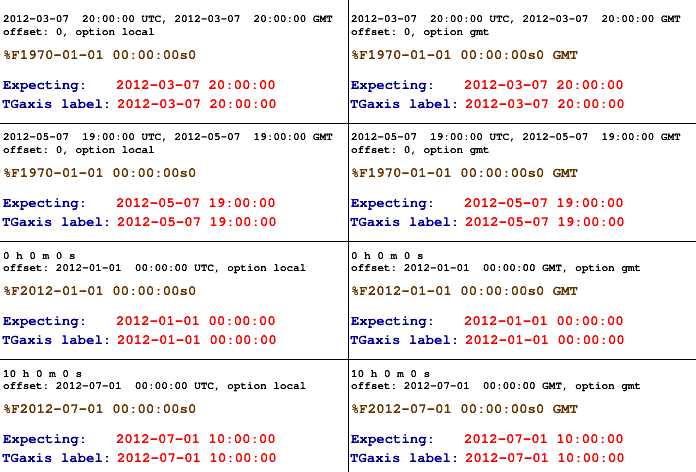

In [4]:
gROOT->GetListOfCanvases()->Draw()